In [22]:
import spacy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [23]:
nlp = spacy.load("en_core_web_sm")

In [24]:
df = pd.read_csv("./data/sample-ner.csv")
df.head()

,sentence,start,end,label
0,Sundar Pichai is the CEO of Google,0,13,PER
1,Sundar Pichai is the CEO of Google,31,37,ORG
2,Elon Musk founded SpaceX,0,9,PER
3,Elon Musk founded SpaceX,18,24,ORG
4,Microsoft was established in 1975,0,9,ORG


In [25]:
y_true = []
y_pred = []

for _, row in df.iterrows():
    text = row["sentence"]
    true_start = row["start"]
    true_end = row["end"]
    true_label = row["label"]

    doc = nlp(text)

    predicted_label = "O"  # default = not detected

    for ent in doc.ents:
        # exact span match
        if ent.start_char == true_start and ent.end_char == true_end:
            predicted_label = ent.label_
            break

    y_true.append(true_label)
    y_pred.append(predicted_label)

       PER  ORG  LOC  DATE  MONEY  O
PER      0    1    0     0      0  3
ORG      0    5    0     0      0  2
LOC      0    0    0     0      0  4
DATE     0    0    0     0      0  3
MONEY    0    0    0     0      1  1
O        0    0    0     0      0  0


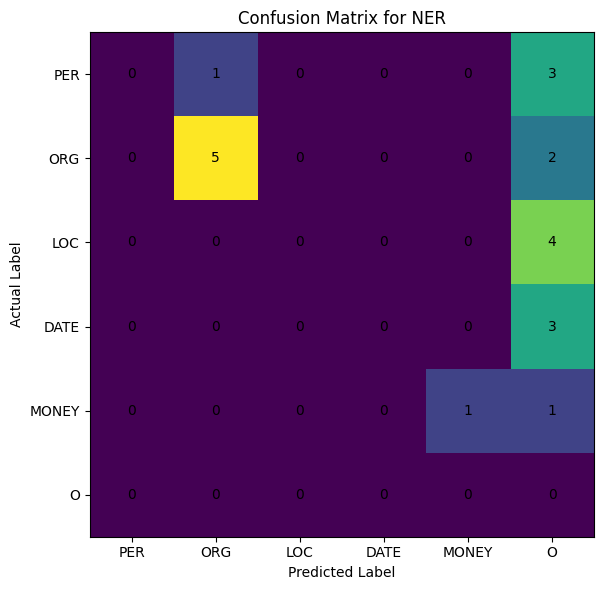

In [30]:
labels = ["PER", "ORG", "LOC", "DATE", "MONEY", "O"]

cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print(cm_df)

plt.figure(figsize=(7, 6))
plt.imshow(cm)
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for NER")

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i][j], ha="center", va="center")

plt.tight_layout()
plt.show()

In [31]:
print(
    classification_report(
        y_true,
        y_pred,
        labels=labels,
        zero_division=0
    )
)


              precision    recall  f1-score   support

         PER       0.00      0.00      0.00         6
         ORG       0.83      0.71      0.77         7
         LOC       0.00      0.00      0.00         4
        DATE       0.00      0.00      0.00         3
       MONEY       1.00      0.50      0.67         2
           O       0.00      0.00      0.00         0

   micro avg       0.30      0.27      0.29        22
   macro avg       0.31      0.20      0.24        22
weighted avg       0.36      0.27      0.31        22

